<a href="https://colab.research.google.com/github/Kusumapriya58/Fake-job-detection/blob/main/DT_%26_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Accuracy: 0.9661633109619687
Random Forest Accuracy: 0.9807046979865772

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.99      0.61      0.75       173

    accuracy                           0.98      3576
   macro avg       0.99      0.80      0.87      3576
weighted avg       0.98      0.98      0.98      3576



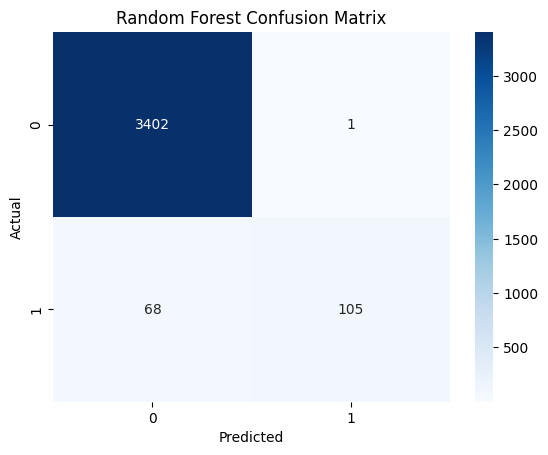

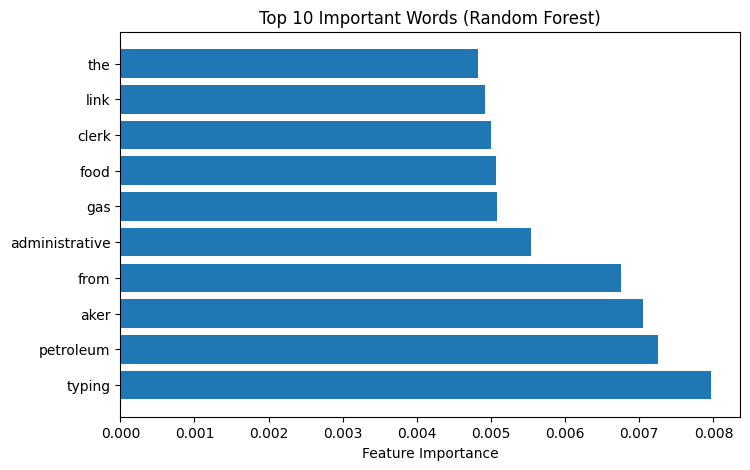

In [ ]:
# Day 6: Decision Tree & Random Forest Models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed dataset
df = pd.read_csv('fake_job_postings.csv')
df = df.dropna(subset=['description']) # Changed to 'description'

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['description']) # Changed to 'description'
y = df['fraudulent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1️⃣ Decision Tree
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 2️⃣ Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = rf.feature_importances_
indices = importances.argsort()[-10:][::-1]
feature_names = vectorizer.get_feature_names_out()

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Important Words (Random Forest)")
plt.xlabel("Feature Importance")
plt.show()

        Accuracy  Precision    Recall        F1
LR      0.967282   1.000000  0.357143  0.526316
DT_10   0.962528   0.852941  0.318681  0.464000
DT_20   0.968121   0.833333  0.467033  0.598592
DT_30   0.970917   0.842105  0.527473  0.648649
RF_50   0.978468   0.990654  0.582418  0.733564
RF_100  0.978468   1.000000  0.576923  0.731707
RF_200  0.978468   1.000000  0.576923  0.731707


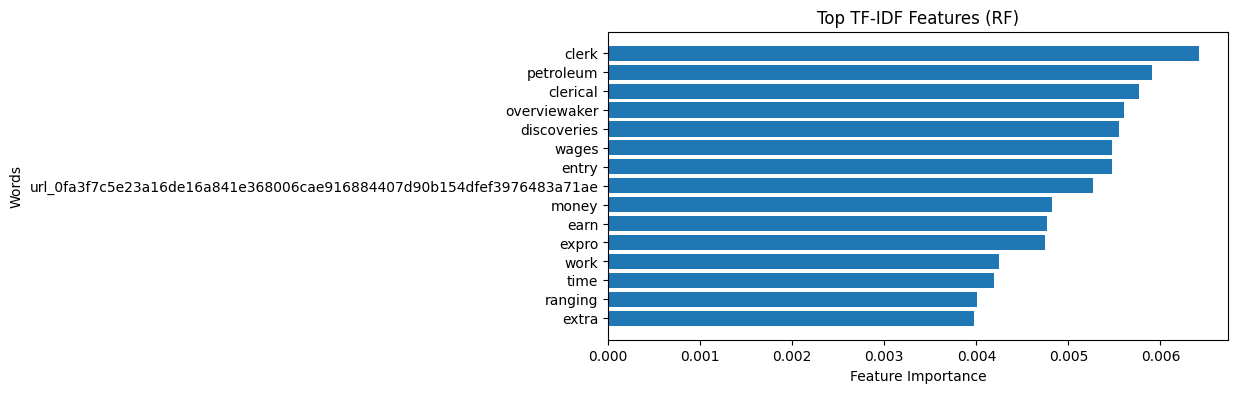

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("fake_job_postings.csv")
df = df.dropna(subset=["description"])

X = df["description"]
y = df["fraudulent"]

vec = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vec.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

def scores(model):
    model.fit(X_train, y_train)
    p = model.predict(X_test)
    return [
        accuracy_score(y_test, p),
        precision_score(y_test, p),
        recall_score(y_test, p),
        f1_score(y_test, p)
    ]

results = {}

lr = LogisticRegression(max_iter=2000)
results["LR"] = scores(lr)

for d in [10, 20, 30]:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    results[f"DT_{d}"] = scores(dt)

for n in [50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    results[f"RF_{n}"] = scores(rf)

df_results = pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1"]).T
print(df_results)

rf_final = RandomForestClassifier(n_estimators=200, random_state=42)
rf_final.fit(X_train, y_train)
imp = rf_final.feature_importances_
idx = np.argsort(imp)[::-1][:15]

words = [vec.get_feature_names_out()[i] for i in idx]
vals = imp[idx]

plt.figure(figsize=(8,4))
plt.barh(words[::-1], vals[::-1])
plt.title("Top TF-IDF Features (RF)")
plt.xlabel("Feature Importance")
plt.ylabel("Words")
plt.show()


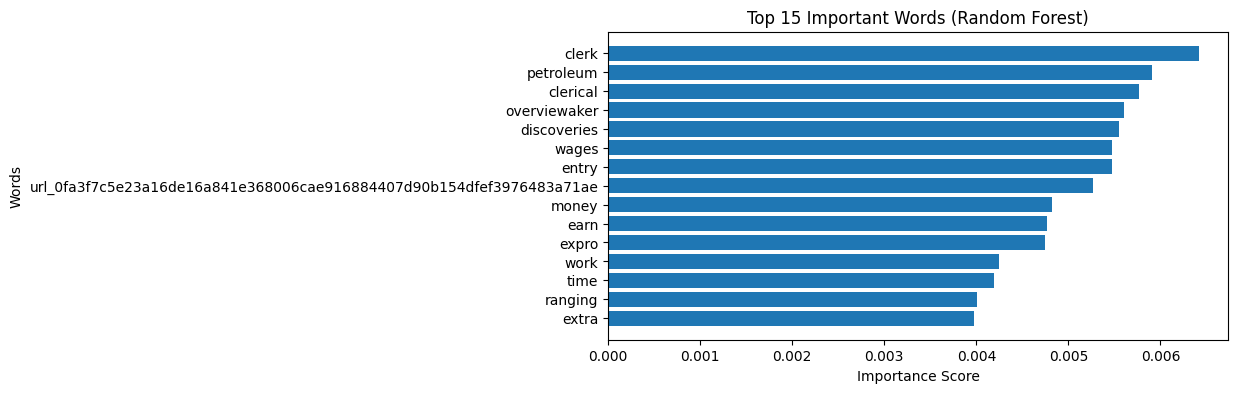

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rf_best = RandomForestClassifier(n_estimators=200, random_state=42)
rf_best.fit(X_train, y_train)

importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1][:15]

top_words = [vec.get_feature_names_out()[i] for i in indices]
top_scores = importances[indices]

plt.figure(figsize=(8,4))
plt.barh(top_words[::-1], top_scores[::-1])
plt.title("Top 15 Important Words (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Words")
plt.show()